In [2]:
# SARIMA   
import yfinance as yf
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [3]:
# Descargar los datos del maíz
df = yf.download('ZC=F', start='2015-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
# Convertir el indice a columna
df.reset_index(inplace=True)

In [5]:
# Guardar las fechas y el precio de cierre
dates = df['Date']
close_prices = df['Close']

In [6]:
# Numerar el indice de 0 a x
close_prices.index = range(len(close_prices))

In [7]:
# Ajustar el modelo SARIMA
sarima_model = SARIMAX(close_prices, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/antonio/anaconda3/envs/data_science_path/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70096D+00    |proj g|=  7.34065D-02

At iterate    5    f=  3.58115D+00    |proj g|=  3.87333D-02

At iterate   10    f=  3.57988D+00    |proj g|=  1.22203D-02

At iterate   15    f=  3.57820D+00    |proj g|=  1.75835D-03

At iterate   20    f=  3.57802D+00    |proj g|=  1.72607D-04

At iterate   25    f=  3.57799D+00    |proj g|=  3.76659D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   

In [8]:
#mostrar el resumen del modelo
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               ZC=F   No. Observations:                 2260
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8086.263
Date:                            Thu, 09 Jan 2025   AIC                          16182.527
Time:                                    17:26:44   BIC                          16211.113
Sample:                                         0   HQIC                         16192.961
                                           - 2260                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3147      1.526      0.206      0.837      -2.676       3.306
ma.L1         -0.3217      1.522     -0.211      0.833      -3.305       2.661
ar.S.L12       0.0120      0.011      1.081      0.280      -0.010       0.034
ma.S.L12      -0.9993      0.072    -13.905      0.000      -1.140      -0.858
sigma2        76.1174      5.025     15.148      0.000      66.269      85.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             92162.84
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.22   Skew:                            -2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Obtener predicciones dentro de la muestra
in_sample_preds = sarima_fit.predict(start=0, end=len(close_prices) - 1)

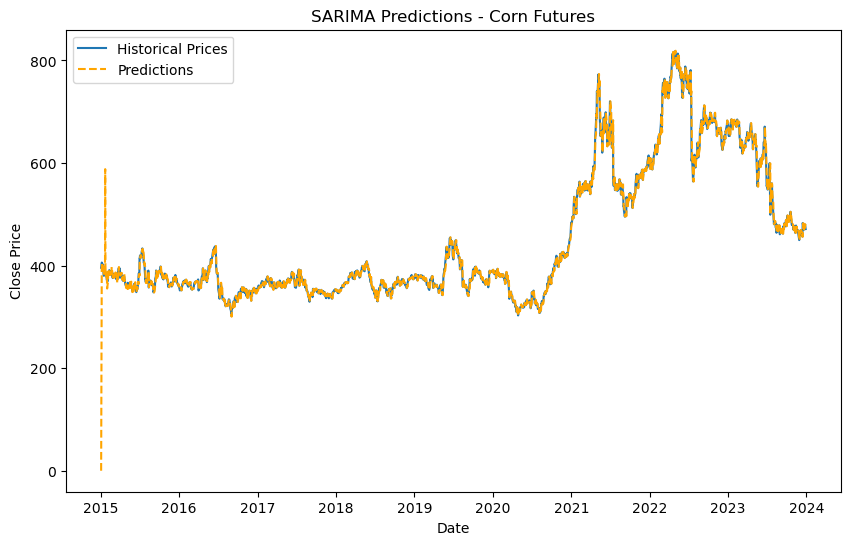

In [12]:
#Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(dates, close_prices, label='Historical Prices')
plt.plot(dates, in_sample_preds, label='Predictions', linestyle='--', color='orange')
plt.title('SARIMA Predictions - Corn Futures')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()